# Comparing NIRCam SW and LW lightcurves with jump tracers

In this notebook we will compare the white-light lightcurve of LW data and photometric lightcurve of SW data with the so-called jump tracers. These include principal components of SW photometry, guide star photometry and FWHM of the long-wave data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

Doing photometry on individual mirror segments, we know the exact time of two jump events. Additionally, by looking at the telemetry we also know the location of high-gain antenae move.

In [2]:
# Input and Output paths
p1 = '/'.join(os.getcwd().split('/')[:-1])

## Loading SW photometry
tim_sw, fl_sw, fle_sw = np.loadtxt(p1 + '/NRCSW/Outputs/NRCSW/Photometry_NRCSW_photutils.dat',\
                                   usecols=(0,1,2), unpack=True)
tim_sw = tim_sw + 2400000.5

## Loading 1st PC of SW photometry
pc_all = np.load(p1 + '/NRCSW/Outputs/NRCSW/PCs.npy')
pc1 = pc_all[0,:]

## Loading LW white-light lightcurve
tim_lw, fl_lw, fle_lw = np.loadtxt(p1 + '/NRCLW/Analysis/White/lc.dat', usecols=(0,1,2), unpack=True)

## Loading LW FWHM
fwhm = np.loadtxt(p1 + '/NRCLW/Outputs/NRCLW/fwhm_full_NRCLW.dat', usecols=0, unpack=True)

## Loading the guide-star photometry
tim_gs, fl_gs = np.loadtxt(p1 + '/spk/Outputs/NRCSW/Guide_star_binned_NRCSW.dat', usecols=(0,1), unpack=True)

## Name of all parameters
params = [pc1, fwhm, fl_gs]
lbls = ['PC0', 'FWHM', 'GS']

## Location of jump events
jump1, jump2 = 2459701.941132727, 2459701.9777086237
hgmove = (2459701.9236214 + 2459701.9237162) / 2

## Fow long-wave white-light lightcurve

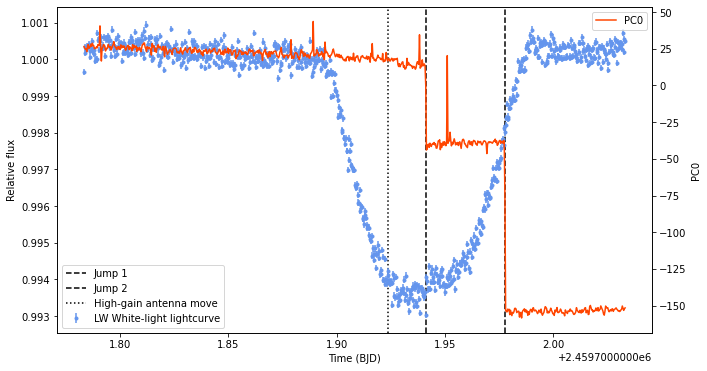

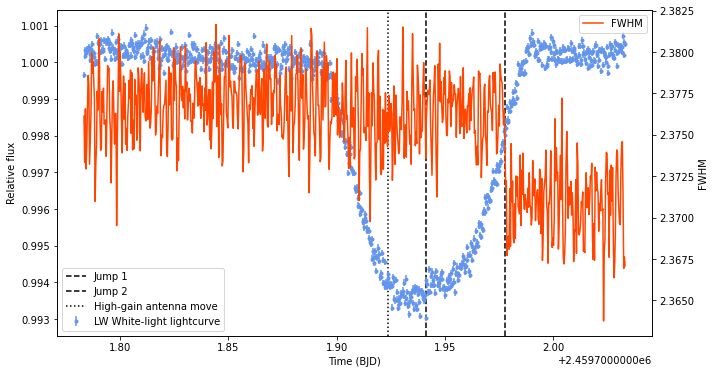

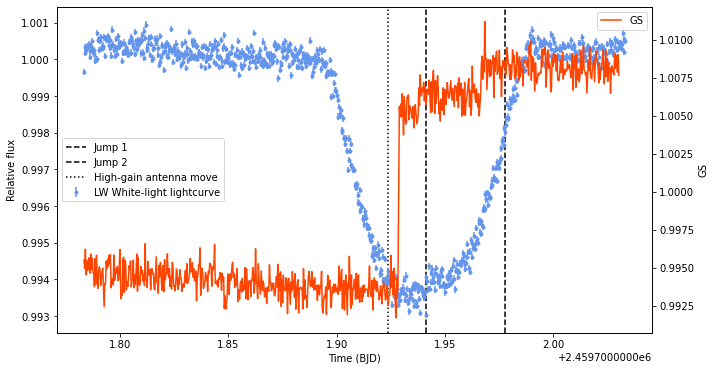

In [3]:
# Making a figure for longwave white-light lightcurve
for i in range(len(params)):
    # Making one figure for each parameters
    plt.figure(figsize=(16/1.5, 9/1.5))
    plt.errorbar(tim_lw, fl_lw, yerr=fle_lw, fmt='.', color='cornflowerblue', zorder=10, label='LW White-light lightcurve')
    plt.xlabel('Time (BJD)')
    plt.ylabel('Relative flux')
    # Location of jumps
    plt.axvline(jump1, color='k', ls='--', zorder=5, label='Jump 1')
    plt.axvline(jump2, color='k', ls='--', zorder=5, label='Jump 2')
    plt.axvline(hgmove, color='k', ls=':', zorder=5, label='High-gain antenna move')
    if i!=2:
        plt.legend(loc='best')
    else:
        plt.legend(loc='center left')

    # And plotting the parameter on the other axis
    plt.twinx()
    plt.plot(tim_lw, params[i], color='orangered', zorder=20, label=lbls[i])
    plt.ylabel(lbls[i])#, rotation=270)

    plt.legend(loc='best')

Awesome! It looks like the first principal component of SW PSF can accurately sense the location of tilt events. On the other hand, it looks like FWHM could detect some events, but not all. Finally, I am not sure what is going on with guide-star photometry.

## For short-wave photometry

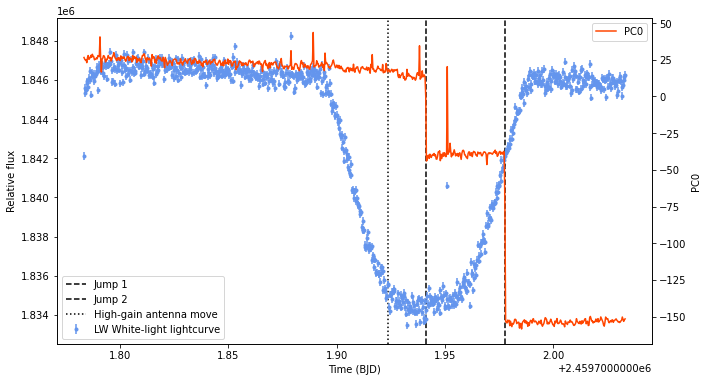

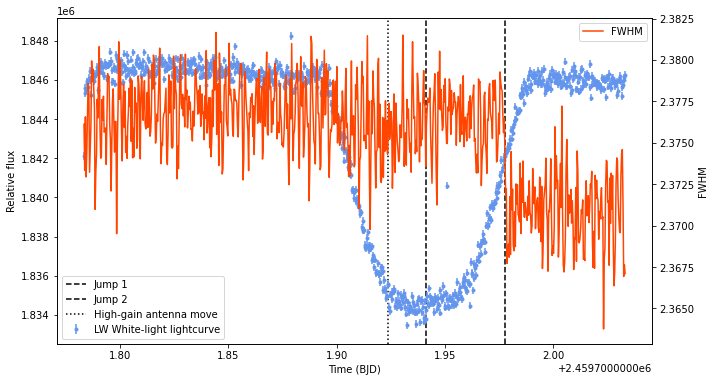

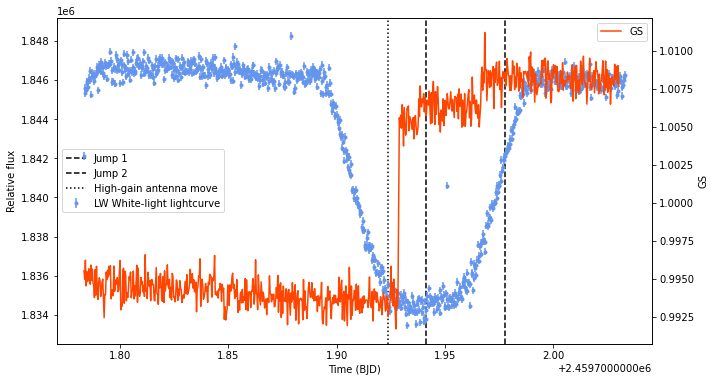

In [4]:
# Making a figure for longwave white-light lightcurve
for i in range(len(params)):
    # Making one figure for each parameters
    plt.figure(figsize=(16/1.5, 9/1.5))
    plt.errorbar(tim_sw, fl_sw, yerr=fle_sw, fmt='.', color='cornflowerblue', zorder=10, label='LW White-light lightcurve')
    plt.xlabel('Time (BJD)')
    plt.ylabel('Relative flux')
    # Location of jumps
    plt.axvline(jump1, color='k', ls='--', zorder=5, label='Jump 1')
    plt.axvline(jump2, color='k', ls='--', zorder=5, label='Jump 2')
    plt.axvline(hgmove, color='k', ls=':', zorder=5, label='High-gain antenna move')
    if i!=2:
        plt.legend(loc='best')
    else:
        plt.legend(loc='center left')

    # And plotting the parameter on the other axis
    plt.twinx()
    plt.plot(tim_lw, params[i], color='orangered', zorder=20, label=lbls[i])
    plt.ylabel(lbls[i])#, rotation=270)

    plt.legend(loc='best')